In [36]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
from scipy import signal
plt.style.use('science')
plt.style.use('nature')

In [105]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use('science')
plt.style.use('nature')
from __future__ import annotations
try:
    from scripts_for_plotting import *
except ModuleNotFoundError:
    import sys
    sys.path.append('../')
    from scripts_for_plotting import *

In [214]:
observed_path = "/media/advait/DATA/research/rcb-project/TSFitPy/input_files/observed_spectra"
# star = "AOHer"
# observed_file = f"{observed_path}/{star}.txt"
# observed_data = np.loadtxt(observed_file, unpack=True)
# obs_wave, obs_flux, obs_err = observed_data[0], observed_data[1], observed_data[2]

In [266]:
rcb_stars = ["IRAS 1813+", "NSV11154","ASAS-RCB-18", "WISEJ1942", "WISE222", "AOHer", "ASAS-RCB-21"]
rcb_data = {}
for star in rcb_stars:
    if rcb_stars.index(star) > 0:
        observed_file = f"{observed_path}/{star}.txt"
        observed_data = np.loadtxt(observed_file, unpack=True)
        obs_wave, obs_flux, obs_err = observed_data[0], observed_data[1], observed_data[2]
        idxs = np.where(obs_flux < 1.1)
        obs_wave = obs_wave[idxs]
        obs_flux = obs_flux[idxs]
        obs_err = obs_err[idxs]
        fs = 1/(obs_flux[1000] - obs_flux[999])
        fs = 100000
        fc = 12000  # Cut-off frequency of the filter
        w = fc / (fs / 2) # Normalize the frequency
        try:
            b, a = signal.butter(5, w, 'low')
            obs_flux = signal.filtfilt(b, a, obs_flux)
        except:
            print(f"Failed to filter {star}")
            print(fs)
        rcb_data[star] = [obs_wave/1e4, obs_flux, obs_err]


In [267]:
rcb_data

{'NSV11154': [array([2.2565332 , 2.2565425 , 2.25655204, ..., 2.5368795 , 2.54171419,
         2.5424481 ]),
  array([0.8192    , 0.81919666, 0.81919359, ..., 1.0371179 , 1.020182  ,
         1.00049107]),
  array([0.1522, 0.1522, 0.1522, ..., 0.2984, 0.1473, 0.1026])],
 'ASAS-RCB-18': [array([2.25472615, 2.25473544, 2.25476356, ..., 2.53680488, 2.53939946,
         2.54464987]),
  array([0.91473285, 0.91040018, 0.9026102 , ..., 0.88013268, 0.6922164 ,
         0.45728807]),
  array([0.0326, 0.0321, 0.0292, ..., 0.1104, 0.2051, 0.2554])],
 'WISEJ1942': [array([2.25464105, 2.25465058, 2.25465988, ..., 2.54482181, 2.54483205,
         2.54488258]),
  array([1.0173661 , 0.9872713 , 0.96144266, ..., 0.97694004, 0.98415147,
         1.00210918]),
  array([0.0288, 0.0253, 0.0243, ..., 0.1711, 0.1916, 0.2992])],
 'WISE222': [array([2.25527897, 2.2552885 , 2.2552978 , ..., 2.54617546, 2.54618571,
         2.54619572]),
  array([0.8633552 , 0.91992384, 0.96720217, ..., 1.05943036, 1.06959538,
 

In [268]:
rcb_stars.index("ASAS-RCB-18")

2

In [269]:
CN_synth_data = np.loadtxt(f"{observed_path}/ASAS-RCB-21_CN_synthetic.txt", unpack=True)
CN_wave, CN_flux = CN_synth_data[0], CN_synth_data[1]
CN_wave = CN_wave/1e4

In [270]:
CN_wave

array([2.25481   , 2.25481225, 2.25481451, ..., 2.500295  , 2.5002975 ,
       2.5003    ])

In [271]:
colors = {
    'blue':    '#1F77B4', 
    'orange':  '#FF7F0E',
    'green':   '#4daf4a',
    'pink':    '#f781bf',
    'brown':   '#a65628',
    'purple':  '#9467BD',
    'gray':    '#7F7F7F',
    'red':     '#D62728',
    'yellow':  '#dede00',
    'pink': '#E377C2',
    'olive': "BCBD22"

} 

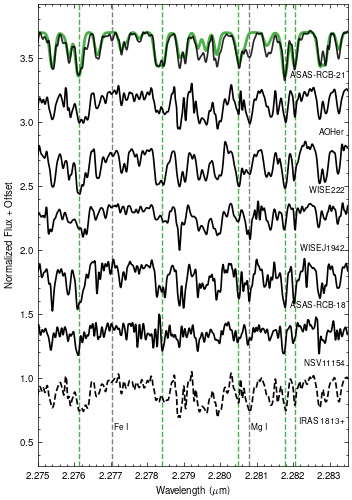

In [272]:
plt.figure(figsize=(4, 6))
plt.xlim(2.275, 2.2835)
# plt.ylim(0.45, 3.8)
offset = 0 
plt.axvline(2.27704, color='gray', linestyle='--')

plt.axvline(2.2808, color='gray', linestyle='--')
plt.text(2.27708, 0.6, "Fe I", fontsize=6, horizontalalignment = 'left')
plt.text(2.28084, 0.6, "Mg I", fontsize=6, horizontalalignment = 'left')

CN_lines = [2.27612, 2.28178, 2.28205, 2.2784 , 2.2805]
for line in CN_lines:
    plt.axvline(line, color=colors['green'], linestyle='--')

for star in rcb_stars:
    if rcb_stars.index(star) > 0:
        if star == "ASAS-RCB-21":
            plt.plot(CN_wave, CN_flux + offset, colors['green'], lw = 2.0)
            plt.plot(rcb_data[star][0], rcb_data[star][1] + offset, 'k-', lw = 1.2, alpha = 0.85)
        else:
            plt.plot(rcb_data[star][0], rcb_data[star][1] + offset, 'k-', lw = 1.2)
        plt.ylabel("Normalized Flux + Offset")
        plt.xlabel(r"Wavelength ($\mu$m)")

        plt.text(2.2834, 0.65 + offset, star, fontsize=6, horizontalalignment = 'right')
        offset += 0.45
    else:
        star2 = 'AOHer'
        plt.plot(rcb_data[star2][0], rcb_data[star2][1] + offset, 'k--', lw = 1.2)
        plt.ylabel("Normalized Flux + Offset")
        plt.xlabel(r"Wavelength ($\mu$m)")
        plt.text(2.2834, 0.65 + offset, star, fontsize=6, horizontalalignment = 'right')
        
        offset += 0.45

plt.savefig("./plots/RCB_CN.pdf", bbox_inches='tight', dpi=300)
plt.savefig("/media/advait/DATA/research/rcb-project/code/6692b5c2905d9ab9e6c1d723/images/RCB_CN.pdf", dpi = 300, bbox_inches='tight')


In [303]:
turbospectrum_paths = {"turbospec_path": "../turbospectrum/exec-ifx/",  # change to /exec-gf/ if gnu compiler
                       "interpol_path": "../scripts/model_interpolators/",
                       "model_atom_path": "../input_files/nlte_data/model_atoms/",
                       "departure_file_path": "../input_files/nlte_data/",
                    #    "model_atmosphere_grid_path": "../input_files/test_model_atmospheres/",
                        "model_atmosphere_grid_path": "../input_files/hdc_model_atmospheres/",
                       "line_list_path": ""}

teff = 5750
logg = 1.0
met = 0.0
vmic = 7.5
lmin = np.min(obs_wave).round(2)
lmax = 2.5e4
# lmax = 22700
ldelta = 0.1
atmosphere_type = "1D"   # "1D" or "3D"
nlte_flag = False
elements_in_nlte = ["Fe", "Mg"]  # can choose several elements, used ONLY if nlte_flag = True

nguess = 9.113
oguess = 8.839
element_abundances ={"H" : 7.5-12, "He" : 11.5-10.93, "C" : 9.85-8.56, "N" : nguess-7.98, "O" : oguess-8.77, "Fe" : 0.0, "Mg" : -1, "S" : -1, "Si": -1, "Na":-1} 
rat = 6.85
vmac = 5
free_isotopes = {"8.016" : rat/(1+rat), "8.017": 0.0, "8.018": 1/(1+rat)}
include_molecules = True  


In [304]:
turbospectrum_paths['line_list_path'] = lists['CN'] 
CN_wave, CN_flux = plot_synthetic_data(turbospectrum_paths, teff, logg, met, vmic, lmin, lmax, ldelta, atmosphere_type, nlte_flag, elements_in_nlte, element_abundances, include_molecules,free_isotopes, resolution=75000, macro=0, rotation=0, do_matplotlib_plot=False)
CN_wave = CN_wave/1e4

Trimming
LINELIST WARNING! File /media/advait/DATA/research/rcb-project/TSFitPy/plotting_tools/../input_files/linelists/individual/CN_new/12C14N_TriHy2.plez.bz2 is not a valid linelist file
Trimming done
Running TS
TS completed


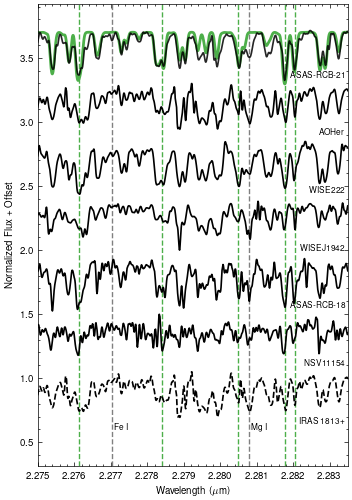

In [305]:
plt.figure(figsize=(4, 6))
plt.xlim(2.275, 2.2835)
# plt.ylim(0.45, 3.8)
offset = 0 
plt.axvline(2.27704, color='gray', linestyle='--')

plt.axvline(2.2808, color='gray', linestyle='--')
plt.text(2.27708, 0.6, "Fe I", fontsize=6, horizontalalignment = 'left')
plt.text(2.28084, 0.6, "Mg I", fontsize=6, horizontalalignment = 'left')

CN_lines = [2.27612, 2.28178, 2.28205, 2.2784 , 2.2805]
for line in CN_lines:
    plt.axvline(line, color=colors['green'], linestyle='--')

for star in rcb_stars:
    if rcb_stars.index(star) > 0:
        if star == "ASAS-RCB-21":
            plt.plot(CN_wave, CN_flux + offset, colors['green'], lw = 2.0)
            plt.plot(rcb_data[star][0], rcb_data[star][1] + offset, 'k-', lw = 1.2, alpha = 0.85)
        else:
            plt.plot(rcb_data[star][0], rcb_data[star][1] + offset, 'k-', lw = 1.2)
        plt.ylabel("Normalized Flux + Offset")
        plt.xlabel(r"Wavelength ($\mu$m)")

        plt.text(2.2834, 0.65 + offset, star, fontsize=6, horizontalalignment = 'right')
        offset += 0.45
    else:
        star2 = 'AOHer'
        plt.plot(rcb_data[star2][0], rcb_data[star2][1] + offset, 'k--', lw = 1.2)
        plt.ylabel("Normalized Flux + Offset")
        plt.xlabel(r"Wavelength ($\mu$m)")
        plt.text(2.2834, 0.65 + offset, star, fontsize=6, horizontalalignment = 'right')
        
        offset += 0.45

plt.savefig("./plots/RCB_CN.pdf", bbox_inches='tight', dpi=300)
plt.savefig("/media/advait/DATA/research/rcb-project/code/6692b5c2905d9ab9e6c1d723/images/RCB_CN.pdf", dpi = 300, bbox_inches='tight')


In [317]:
element_abundances ={"H" : 7.5-12, "He" : 11.5-10.93, "C" : 9.5-8.56, "N" : nguess-7.98, "O" : 8.8+0.3-8.77, "Fe" : 0.0, "Mg" : -1, "S" : -1, "Si": -1, "Na":-1} 


In [318]:
lmin, lmax = 2.427*1e4, 2.4337*1e4
turbospectrum_paths['line_list_path'] = lists['12C16O'] 
wave, C16O_flux = plot_synthetic_data(turbospectrum_paths, teff, logg, met, vmic, lmin, lmax, ldelta, atmosphere_type, nlte_flag, elements_in_nlte, element_abundances, include_molecules,free_isotopes, resolution=75000, macro=0, rotation=0, do_matplotlib_plot=False)
turbospectrum_paths['line_list_path'] = lists['12C18O']
wave, C18O_flux = plot_synthetic_data(turbospectrum_paths, teff, logg, met, vmic, lmin, lmax, ldelta, atmosphere_type, nlte_flag, elements_in_nlte, element_abundances, include_molecules,free_isotopes, resolution=75000, macro=0, rotation=0, do_matplotlib_plot=False)
wave *= 1e-4

Trimming
Trimming done
Running TS
TS completed
Trimming
Trimming done
Running TS
TS completed


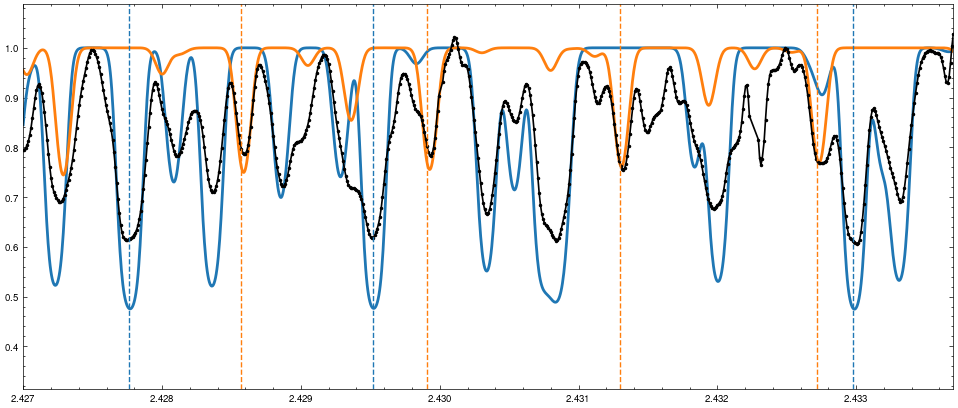

In [319]:
plt.figure(figsize=(12, 5))
plt.xlim(lmin*1e-4, lmax*1e-4)

plt.plot(wave, C16O_flux, label="12C16O", lw = 2, c = colors['blue'])
plt.plot(wave, C18O_flux, label="12C18O", lw = 2, c = colors['orange'])
plt.plot(rcb_data['ASAS-RCB-21'][0], rcb_data['ASAS-RCB-21'][1], 'k.-', lw = 1.2)

C18O_lines = [2.42857, 2.430-0.00009, 2.4313, 2.43272]
for line in C18O_lines:
    plt.axvline(line, color=colors['orange'], linestyle='--')

C16O_lines = [2.42776, 2.42952, 2.433-2e-5]
for line in C16O_lines:
    plt.axvline(line, color=colors['blue'], linestyle='--')

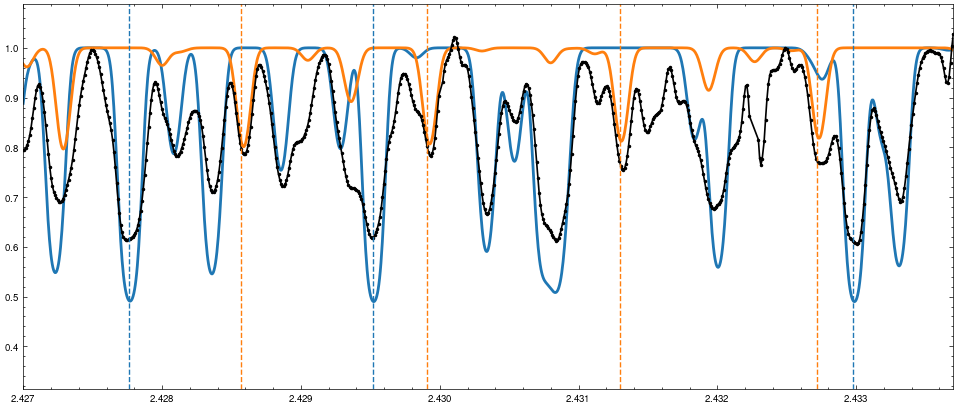

In [310]:
plt.figure(figsize=(12, 5))
plt.xlim(lmin*1e-4, lmax*1e-4)

plt.plot(wave, C16O_flux, label="12C16O", lw = 2, c = colors['blue'])
plt.plot(wave, C18O_flux, label="12C18O", lw = 2, c = colors['orange'])
plt.plot(rcb_data['ASAS-RCB-21'][0], rcb_data['ASAS-RCB-21'][1], 'k.-', lw = 1.2)

C18O_lines = [2.42857, 2.430-0.00009, 2.4313, 2.43272]
for line in C18O_lines:
    plt.axvline(line, color=colors['orange'], linestyle='--')

C16O_lines = [2.42776, 2.42952, 2.433-2e-5]
for line in C16O_lines:
    plt.axvline(line, color=colors['blue'], linestyle='--')

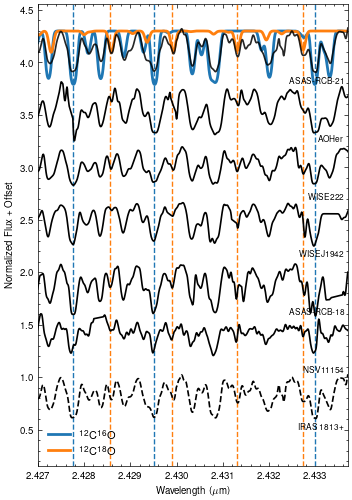

In [308]:
plt.figure(figsize=(4, 6))
plt.xlim(lmin*1e-4, lmax*1e-4)
# plt.ylim(0.45, 3.8)
offset = 0 
# plt.axvline(2.27704, color='gray', linestyle='--')

# plt.axvline(2.2808, color='gray', linestyle='--')
# plt.text(2.27708, 0.55, "Fe I", fontsize=6, horizontalalignment = 'left')
# plt.text(2.28084, 0.55, "Mg I", fontsize=6, horizontalalignment = 'left')

# CN_lines = [2.27612, 2.28178, 2.28205, 2.27845 , 2.2805]
# for line in CN_lines:
#     plt.axvline(line, color=colors['green'], linestyle='--')
C18O_lines = [2.42857, 2.430-0.00009, 2.4313, 2.43272]
for line in C18O_lines:
    plt.axvline(line, color=colors['orange'], linestyle='--')
C16O_lines = [2.42776, 2.42952, 2.433-2e-5]
for line in C16O_lines:
    plt.axvline(line, color=colors['blue'], linestyle='--')
for star in rcb_stars:
    if rcb_stars.index(star) > 0:
        if star == "ASAS-RCB-21":
            plt.plot(wave, C16O_flux + offset, colors['blue'], lw = 2.0, label = r"$^{12}$C$^{16}$O")
            plt.plot(wave, C18O_flux + offset, colors['orange'], lw = 2.0, label = r"$^{12}$C$^{18}$O")
            plt.plot(rcb_data[star][0], rcb_data[star][1] + offset, 'k-', lw = 1.2, alpha = 0.85)
        else:
            plt.plot(rcb_data[star][0], rcb_data[star][1] + offset, 'k-', lw = 1.2)
        plt.ylabel("Normalized Flux + Offset")
        plt.xlabel(r"Wavelength ($\mu$m)")

        plt.text(lmax*1e-4-0.0001, 0.5 + offset, star, fontsize=6, horizontalalignment = 'right')
        offset += 0.55
    else:
        star2 = 'ASAS-RCB-21'
        plt.plot(rcb_data[star2][0], rcb_data[star2][1] + offset, 'k--', lw = 1.2)
        plt.ylabel("Normalized Flux + Offset")
        plt.xlabel(r"Wavelength ($\mu$m)")
        plt.text(lmax*1e-4-0.0001, 0.5 + offset, star, fontsize=6, horizontalalignment = 'right')
        offset += 0.55
plt.legend(fontsize = 8, loc = 'lower left')
plt.savefig("/media/advait/DATA/research/rcb-project/code/6692b5c2905d9ab9e6c1d723/images/RCB_CO.pdf", dpi = 300, bbox_inches='tight')


In [289]:
hdc_stars = ["HD182040", "B42","C38",  "A223", "B566", "HD137613"]
hdc_data = {}
for star in hdc_stars:
    if hdc_stars.index(star) > 0:
        observed_file = f"{observed_path}/{star}.txt"
        observed_data = np.loadtxt(observed_file, unpack=True)
        obs_wave, obs_flux, obs_err = observed_data[0], observed_data[1], observed_data[2]
        idxs = np.where(obs_flux < 1.1)
        obs_wave = obs_wave[idxs]
        obs_flux = obs_flux[idxs]
        obs_err = obs_err[idxs]
        fs = 1/(obs_flux[1000] - obs_flux[999])
        fs = 100000
        fc = 12000  # Cut-off frequency of the filter
        w = fc / (fs / 2) # Normalize the frequency
        try:
            b, a = signal.butter(5, w, 'low')
            obs_flux = signal.filtfilt(b, a, obs_flux)
        except:
            print(f"Failed to filter {star}")
            print(fs)
        hdc_data[star] = [obs_wave/1e4, obs_flux, obs_err]

In [301]:
turbospectrum_paths = {"turbospec_path": "../turbospectrum/exec-ifx/",  # change to /exec-gf/ if gnu compiler
                       "interpol_path": "../scripts/model_interpolators/",
                       "model_atom_path": "../input_files/nlte_data/model_atoms/",
                       "departure_file_path": "../input_files/nlte_data/",
                    #    "model_atmosphere_grid_path": "../input_files/test_model_atmospheres/",
                        "model_atmosphere_grid_path": "../input_files/hdc_model_atmospheres/",
                       "line_list_path": ""}
lists = {}
basepath = "../input_files/linelists/individual/"
lists['CN'] = basepath + "CN_new"
lists['12C16O'] = basepath + "12C16O"
lists['12C18O'] = basepath + "12C18O"
lists['C2'] = basepath + "C2"
lists['atoms'] = basepath + "atoms_5500K_newCI"

teff = 5500
logg = 1.0
met = 0.0
vmic = 6.5
lmin, lmax = 2.275*1e4, 2.2835*1e4
# lmax = 22700
ldelta = 0.1
atmosphere_type = "1D"   # "1D" or "3D"
nlte_flag = False
elements_in_nlte = ["Fe", "Mg"]  # can choose several elements, used ONLY if nlte_flag = True

nguess =  9.195
oguess = 8.695
rat = 0.52
# element_abundances ={"H" : 7.5-12, "He" : 11.5-10.93, "C" : 9.52-8.56, "N" : nguess-7.98, "O" : oguess-8.77, "Fe" : 0.0, "Mg" : -1, "S" : -1, "Si": -1, "Na":-1} 
# nguess = 
element_abundances ={"H" : 7.5-12, "He" : 11.5-10.93, "C" : 9.72-8.56, "N" : nguess-7.98, "O" : oguess-8.77, "Fe":-0.2, "Mg":+0.2} 

vmac = 0
free_isotopes = {"8.016" : rat/(1+rat), "8.017": 0.0, "8.018": 1/(1+rat)}
include_molecules = True  


In [302]:
turbospectrum_paths['line_list_path'] = lists['CN'] 
CN_wave, CN_flux = plot_synthetic_data(turbospectrum_paths, teff, logg, met, vmic, lmin, lmax, ldelta, atmosphere_type, nlte_flag, elements_in_nlte, element_abundances, include_molecules,free_isotopes, resolution=75000, macro=0, rotation=0, do_matplotlib_plot=False)

Trimming
LINELIST WARNING! File /media/advait/DATA/research/rcb-project/TSFitPy/plotting_tools/../input_files/linelists/individual/CN_new/12C14N_TriHy2.plez.bz2 is not a valid linelist file
Trimming done
Running TS
TS completed


In [292]:
# CN_synth_data = np.loadtxt(f"{observed_path}/HD137613_CN_synthetic.txt", unpack=True)
# CN_wave, CN_flux = CN_synth_data[0], CN_synth_data[1]
CN_wave = CN_wave/1e4

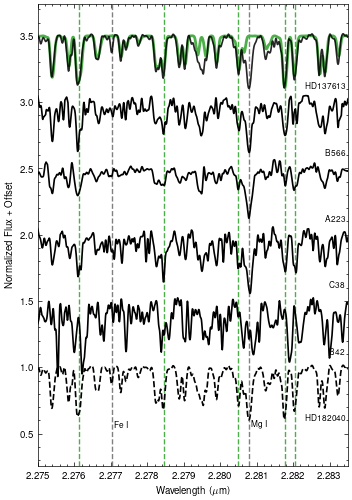

In [293]:
plt.figure(figsize=(4, 6))
plt.xlim(2.275, 2.2835)
# plt.ylim(0.45, 3.8)
offset = 0 
plt.axvline(2.27704, color='gray', linestyle='--')

plt.axvline(2.2808, color='gray', linestyle='--')
plt.text(2.27708, 0.55, "Fe I", fontsize=6, horizontalalignment = 'left')
plt.text(2.28084, 0.55, "Mg I", fontsize=6, horizontalalignment = 'left')

CN_lines = [2.27612, 2.28178, 2.28205, 2.27845 , 2.2805]
for line in CN_lines:
    plt.axvline(line, color=colors['green'], linestyle='--')

for star in hdc_stars:
    if hdc_stars.index(star) > 0:
        if star == "HD137613":
            plt.plot(CN_wave, CN_flux + offset, colors['green'], lw = 2.0)
            plt.plot(hdc_data[star][0], hdc_data[star][1] + offset, 'k-', lw = 1.2, alpha = 0.85)
        else:
            plt.plot(hdc_data[star][0], hdc_data[star][1] + offset, 'k-', lw = 1.2)
        plt.ylabel("Normalized Flux + Offset")
        plt.xlabel(r"Wavelength ($\mu$m)")

        plt.text(2.2834, 0.6 + offset, star, fontsize=6, horizontalalignment = 'right')
        offset += 0.5
    else:
        star2 = 'HD137613'
        plt.plot(hdc_data[star2][0], hdc_data[star2][1] + offset, 'k--', lw = 1.2)
        plt.ylabel("Normalized Flux + Offset")
        plt.xlabel(r"Wavelength ($\mu$m)")
        plt.text(2.2834, 0.6 + offset, star, fontsize=6, horizontalalignment = 'right')
        offset += 0.5

plt.savefig("./plots/HDC_CN.pdf", bbox_inches='tight', dpi=300)
plt.savefig("/media/advait/DATA/research/rcb-project/code/6692b5c2905d9ab9e6c1d723/images/HDC_CN.pdf", dpi = 300, bbox_inches='tight')


In [294]:
2.2835-2.275

0.008500000000000174

In [295]:
2.427+0.0085

2.4355

In [296]:
element_abundances["O"] = 8.7 - 8.77
rat = 0.52
free_isotopes = {"8.016" : rat/(1+rat), "8.017": 0.0, "8.018": 1/(1+rat)}


In [297]:
element_abundances

{'H': -4.5,
 'He': 0.5700000000000003,
 'C': 1.1600000000000001,
 'N': 1.2149999999999999,
 'O': -0.07000000000000028,
 'Fe': -0.2,
 'Mg': 0.2}

In [298]:
lmin, lmax = 2.427*1e4, 2.4337*1e4
turbospectrum_paths['line_list_path'] = lists['12C16O'] 
wave, C16O_flux = plot_synthetic_data(turbospectrum_paths, teff, logg, met, vmic, lmin, lmax, ldelta, atmosphere_type, nlte_flag, elements_in_nlte, element_abundances, include_molecules,free_isotopes, resolution=75000, macro=0, rotation=0, do_matplotlib_plot=False)
turbospectrum_paths['line_list_path'] = lists['12C18O']
wave, C18O_flux = plot_synthetic_data(turbospectrum_paths, teff, logg, met, vmic, lmin, lmax, ldelta, atmosphere_type, nlte_flag, elements_in_nlte, element_abundances, include_molecules,free_isotopes, resolution=75000, macro=0, rotation=0, do_matplotlib_plot=False)
wave *= 1e-4

Trimming
Trimming done
Running TS
TS completed
Trimming
Trimming done
Running TS
TS completed


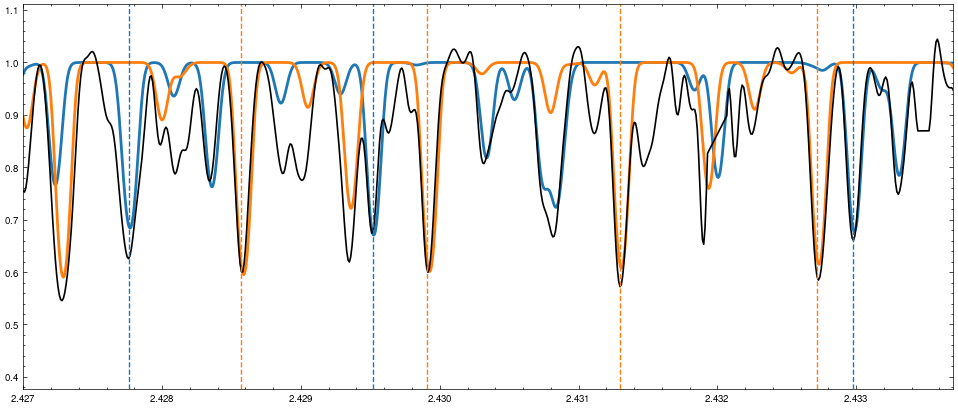

In [299]:
plt.figure(figsize=(12, 5))
plt.xlim(lmin*1e-4, lmax*1e-4)

plt.plot(wave, C16O_flux, label="12C16O", lw = 2, c = colors['blue'])
plt.plot(wave, C18O_flux, label="12C18O", lw = 2, c = colors['orange'])
plt.plot(hdc_data['HD137613'][0], hdc_data['HD137613'][1], 'k-', lw = 1.2)

C18O_lines = [2.42857, 2.430-0.00009, 2.4313, 2.43272]
for line in C18O_lines:
    plt.axvline(line, color=colors['orange'], linestyle='--')

C16O_lines = [2.42776, 2.42952, 2.433-2e-5]
for line in C16O_lines:
    plt.axvline(line, color=colors['blue'], linestyle='--')

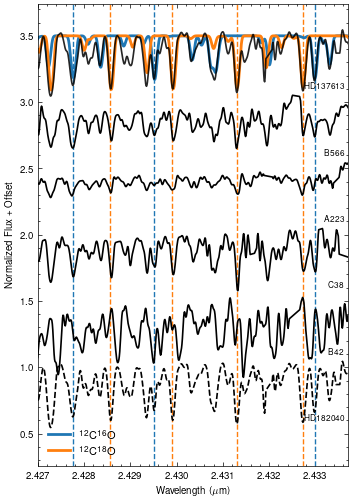

In [300]:
plt.figure(figsize=(4, 6))
plt.xlim(lmin*1e-4, lmax*1e-4)
# plt.ylim(0.45, 3.8)
offset = 0 
# plt.axvline(2.27704, color='gray', linestyle='--')

# plt.axvline(2.2808, color='gray', linestyle='--')
# plt.text(2.27708, 0.55, "Fe I", fontsize=6, horizontalalignment = 'left')
# plt.text(2.28084, 0.55, "Mg I", fontsize=6, horizontalalignment = 'left')

# CN_lines = [2.27612, 2.28178, 2.28205, 2.27845 , 2.2805]
# for line in CN_lines:
#     plt.axvline(line, color=colors['green'], linestyle='--')
C18O_lines = [2.42857, 2.430-0.00009, 2.4313, 2.43272]
for line in C18O_lines:
    plt.axvline(line, color=colors['orange'], linestyle='--')
C16O_lines = [2.42776, 2.42952, 2.433-2e-5]
for line in C16O_lines:
    plt.axvline(line, color=colors['blue'], linestyle='--')
for star in hdc_stars:
    if hdc_stars.index(star) > 0:
        if star == "HD137613":
            plt.plot(wave, C16O_flux + offset, colors['blue'], lw = 2.0, label = r"$^{12}$C$^{16}$O")
            plt.plot(wave, C18O_flux + offset, colors['orange'], lw = 2.0, label = r"$^{12}$C$^{18}$O")
            plt.plot(hdc_data[star][0], hdc_data[star][1] + offset, 'k-', lw = 1.2, alpha = 0.85)
        else:
            plt.plot(hdc_data[star][0], hdc_data[star][1] + offset, 'k-', lw = 1.2)
        plt.ylabel("Normalized Flux + Offset")
        plt.xlabel(r"Wavelength ($\mu$m)")

        plt.text(lmax*1e-4-0.0001, 0.6 + offset, star, fontsize=6, horizontalalignment = 'right')
        offset += 0.5
    else:
        star2 = 'HD137613'
        plt.plot(hdc_data[star2][0], hdc_data[star2][1] + offset, 'k--', lw = 1.2)
        plt.ylabel("Normalized Flux + Offset")
        plt.xlabel(r"Wavelength ($\mu$m)")
        plt.text(lmax*1e-4-0.0001, 0.6 + offset, star, fontsize=6, horizontalalignment = 'right')
        offset += 0.5
plt.legend(fontsize = 8, loc = 'lower left')
plt.savefig("/media/advait/DATA/research/rcb-project/code/6692b5c2905d9ab9e6c1d723/images/HDC_CO.pdf", dpi = 300, bbox_inches='tight')


In [320]:
lists = {}
basepath = "../input_files/linelists/individual/"
lists['CN'] = basepath + "CN_new"
lists['12C16O'] = basepath + "12C16O"
lists['12C18O'] = basepath + "12C18O"
lists['C2'] = basepath + "C2"

lists['atoms'] = basepath + "atoms_5000K"

lines = pd.read_csv("/media/advait/DATA/research/rcb-project/code/lineranges/atomic.csv")
lines['wav'] = lines['wav']*1e-4

In [355]:
turbospectrum_paths = {"turbospec_path": "../turbospectrum/exec-ifx/",  # change to /exec-gf/ if gnu compiler
                       "interpol_path": "../scripts/model_interpolators/",
                       "model_atom_path": "../input_files/nlte_data/model_atoms/",
                       "departure_file_path": "../input_files/nlte_data/",
                    #    "model_atmosphere_grid_path": "../input_files/test_model_atmospheres/",
                        "model_atmosphere_grid_path": "../input_files/hdc_model_atmospheres/",
                       "line_list_path": ""}

teff = 5000
logg = 1.0
met = 0.0
vmic = 7
lmin = 2.278e4
lmax = 2.289e4
# lmax = 22700
ldelta = 0.1
atmosphere_type = "1D"   # "1D" or "3D"
nlte_flag = False
elements_in_nlte = ["Fe", "Mg"]  # can choose several elements, used ONLY if nlte_flag = True

nguess = 7.876
oguess = 7.74
element_abundances ={"H" : 7.5-12, "He" : 11.5-10.93, "C" : 8.87-8.56, "N" : nguess-7.98, "O" : oguess-8.77, "Mg":-1.2, "S" : -1, "Si":-1, "Ca":-0.8, "Fe":-0.8}
                    #  "Fe" : -1.0, "Mg" : -1, "S" : -1, "Si": -1, "Na":-1, "Ca":-1, "Co":-1} 
rat = 7.47
vmac = 4
free_isotopes = {"8.016" : rat/(1+rat), "8.017": 0.0, "8.018": 1/(1+rat)}
include_molecules = True  


In [356]:
turbospectrum_paths['line_list_path'] = lists['CN'] 
wavelength, syntflux_CN = plot_synthetic_data(turbospectrum_paths, teff, logg, met, vmic, lmin, lmax, ldelta, atmosphere_type, nlte_flag, elements_in_nlte, element_abundances, include_molecules,free_isotopes, resolution=75000, macro=vmac, rotation=0, do_matplotlib_plot=False)

turbospectrum_paths['line_list_path'] = lists['C2'] 
wavelength3, syntflux_C2 = plot_synthetic_data(turbospectrum_paths, teff, logg, met, vmic, lmin, lmax, ldelta, atmosphere_type, nlte_flag, elements_in_nlte, element_abundances, include_molecules,free_isotopes, resolution=75000, macro=vmac, rotation=0, do_matplotlib_plot=False)


turbospectrum_paths['line_list_path'] = lists['atoms'] 
wavelength4, syntflux_atoms = plot_synthetic_data(turbospectrum_paths, teff, logg, met, vmic, lmin, lmax, ldelta, atmosphere_type, nlte_flag, elements_in_nlte, element_abundances, include_molecules,free_isotopes, resolution=75000, macro=vmac, rotation=0, do_matplotlib_plot=False)

turbospectrum_paths['line_list_path'] = "../input_files/linelists/linelist_5000K/"
wavelength, syntflux_all = plot_synthetic_data(turbospectrum_paths, teff, logg, met, vmic, lmin, lmax, ldelta, atmosphere_type, nlte_flag, elements_in_nlte, element_abundances, include_molecules,free_isotopes, resolution=75000, macro=vmac, rotation=0, do_matplotlib_plot=False)

Trimming
LINELIST WARNING! File /media/advait/DATA/research/rcb-project/TSFitPy/plotting_tools/../input_files/linelists/individual/CN_new/12C14N_TriHy2.plez.bz2 is not a valid linelist file
Trimming done
Running TS
TS completed
Trimming
Trimming done
Running TS
TS completed
Trimming
Trimming done
Running TS
TS completed
Trimming
Trimming done
Running TS
TS completed


In [357]:
rcb_data['WISE222']

[array([2.25527897, 2.2552885 , 2.2552978 , ..., 2.54617546, 2.54618571,
        2.54619572]),
 array([0.8633552 , 0.91992384, 0.96720217, ..., 1.05943036, 1.06959538,
        1.08446633]),
 array([0.039 , 0.0476, 0.0527, ..., 0.0499, 0.0533, 0.0569])]

In [358]:
wavelength *= 1e-4

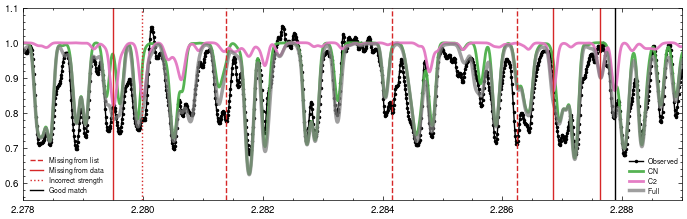

In [446]:
import matplotlib.pyplot as plt

# Plotting the main figure
plt.figure(figsize=(8.5, 2.5))
plt.xlim(lmin * 1e-4, lmax * 1e-4)
plt.ylim(0.55, 1.1)

# Main plot lines
line1, = plt.plot(rcb_data['WISE222'][0], rcb_data['WISE222'][1], 'k.-', lw=1., label="Observed")
line2, = plt.plot(wavelength, syntflux_CN, colors['green'], lw=2, alpha=0.95, label="CN")
line3, = plt.plot(wavelength, syntflux_C2, colors['pink'], lw=2, alpha=0.95, label="C2")
line4, = plt.plot(wavelength, syntflux_all, colors['gray'], lw=2.5, alpha=0.75, label="Full")

# Custom legend for spectral lines
not_in_list = [2.28138, 2.28416, 2.28624]
first_missing = plt.axvline(not_in_list[0], c=colors["red"], ls="--", label="Missing from list")
for line in not_in_list[1:]:
    plt.axvline(line, c=colors["red"], ls="--")

not_in_data = [2.2795, 2.28685, 2.28763]
first_missing_data = plt.axvline(not_in_data[0], c=colors["red"], ls="-", label="Missing from data")
for line in not_in_data[1:]:
    plt.axvline(line, c=colors["red"], ls="-")

incorrect_strength = plt.axvline(2.28 - 1e-5, ls=":", c=colors["red"], label="Incorrect strength")
good_match = plt.axvline(2.288 - 1.2e-4, color="k", label="Good match")

# First legend for main plot lines
main_legend = plt.legend(handles=[line1, line2, line3, line4], fontsize=5, loc="upper left", bbox_to_anchor=(0.91, 0.25))

# Add the first legend to the plot explicitly so it remains when we add the second legend
plt.gca().add_artist(main_legend)

# Second legend for spectral line annotations
plt.legend(handles=[first_missing, first_missing_data, incorrect_strength, good_match],
           fontsize=5, loc="lower left", bbox_to_anchor=(0, 0))

plt.savefig("plots/C2.pdf", dpi = 300, bbox_inches='tight')
plt.savefig("/media/advait/DATA/research/rcb-project/code/6692b5c2905d9ab9e6c1d723/images/C2.pdf", dpi = 300, bbox_inches='tight')


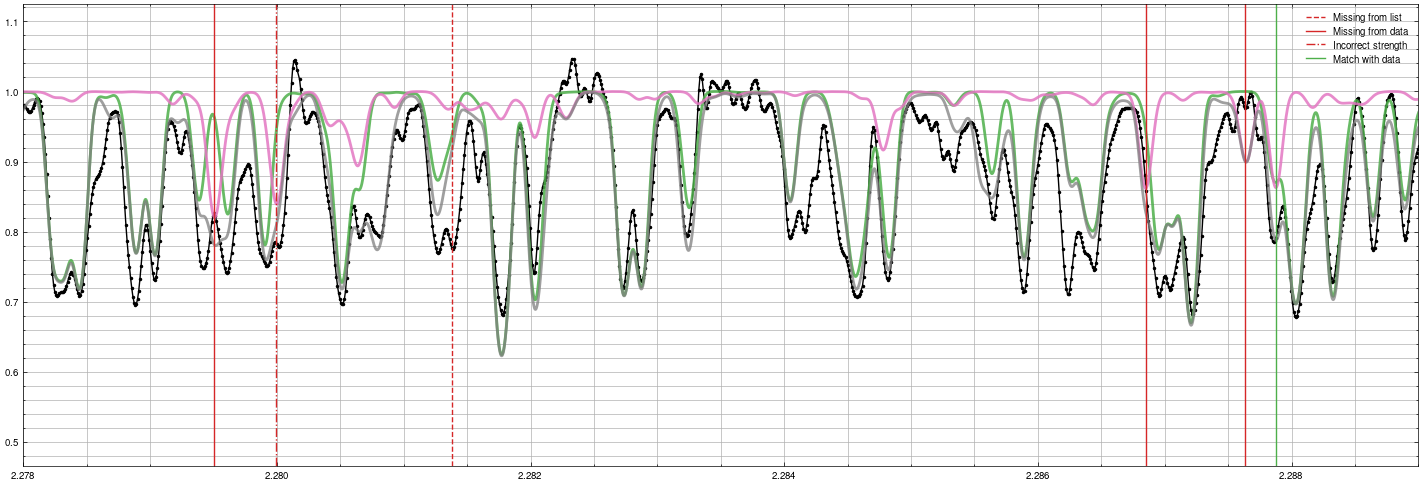

In [411]:
plt.figure(figsize = (18,6))
plt.xlim(lmin*1e-4, lmax*1e-4)
plt.plot(rcb_data['WISE222'][0], rcb_data['WISE222'][1], 'k.-', lw = 1.)
plt.plot(wavelength, syntflux_CN, colors['green'], lw = 2, alpha = 0.85)
plt.plot(wavelength, syntflux_C2, colors['pink'], lw = 2, alpha = 0.85)
# plt.plot(wavelength, syntflux_atoms, colors['red'], lw = 2, alpha = 0.75)
plt.plot(wavelength, syntflux_all, colors['gray'], lw = 2, alpha = 0.75)
# plt.savefig("plots/C2.pdf", dpi = 300, bbox_inches='tight')
plt.grid(which='both', axis='both')
not_in_list = [2.28138, 2.28416, 2.28624]
for line in not_in_list:
    if line == not_in_list[0]:
        plt.axvline(line, c =  colors["red"], ls = "--", label = "Missing from list")
not_in_data = [2.2795, 2.28685, 2.28763]
for line in not_in_data:
    if line == not_in_data[0]:
        plt.axvline(line, c =  colors["red"], ls = "-", label = "Missing from data")
    else:
        plt.axvline(line, c =  colors["red"], ls = "-")
plt.axvline(2.28-1e-5, label = "Incorrect strength", ls = "-.", c =  colors["red"])
plt.axvline(2.288-1.2e-4, color = colors["green"], label = "Match with data")
plt.legend()